In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
from rdkit import Chem

## SELECT CLASS file 95 mol
Estrazione delle classi 1-5 dal file sdf

In [13]:
df = pd.read_csv('/home/federica/LAB2/egfr_qsar/95molecule.csv')


In [ ]:
sdf_file = "/home/federica/LAB2/egfr_qsar/db2_2.sdf"
suppl = Chem.SDMolSupplier(sdf_file)
data = []
for mol in suppl:
    if mol is not None:
        props = mol.GetPropsAsDict()
        props["Smiles"] = Chem.MolToSmiles(mol)
        data.append(props)
df = pd.DataFrame(data)
df

In [ ]:
df_class_1 = df.loc[(df['class'] == 1) | (df['class'] == 2) | (df['class'] == 3) | (df['class'] == 4)]
df_class_1['Smiles (RDKit Mol)'] = ' '
df_class_1.drop(columns=['mutant', 'class'], inplace=True)
df_class_1.to_csv('/home/federica/LAB2/egfr_qsar/class_4.csv', index=False)

## DISTRIBUTION
y_pred e valore sperimentale

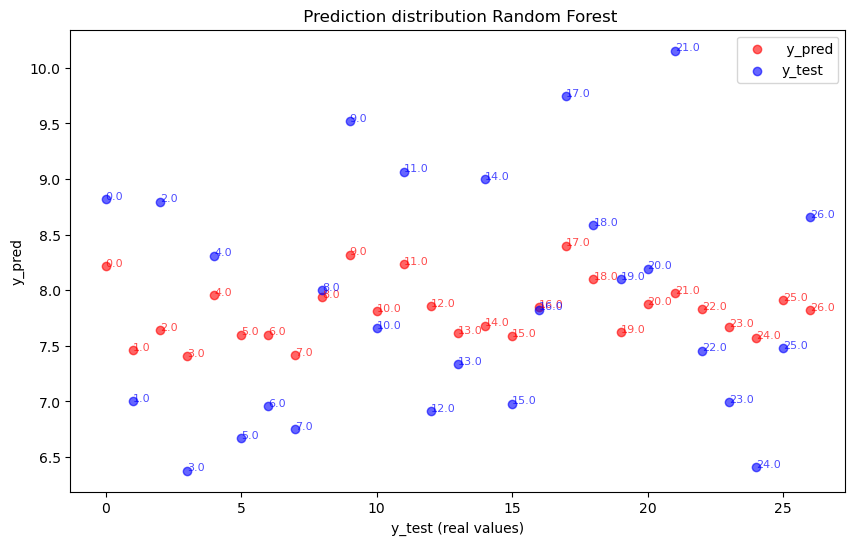

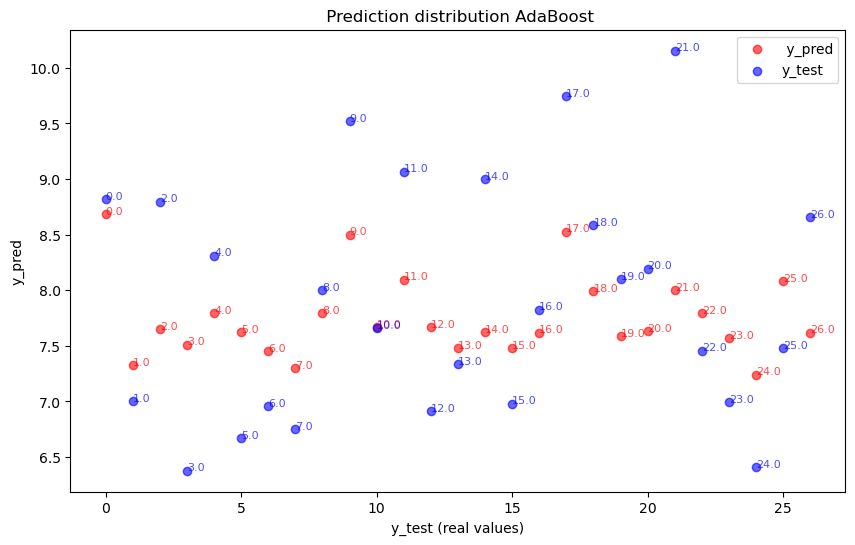

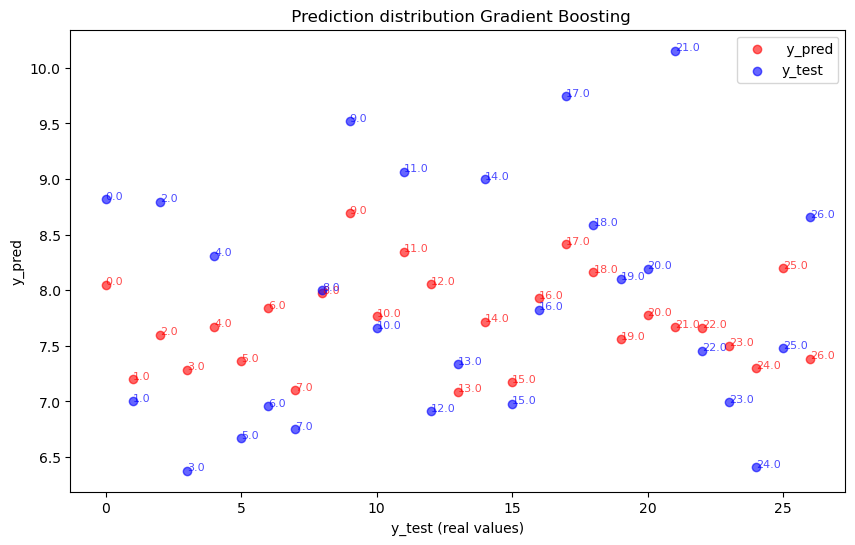

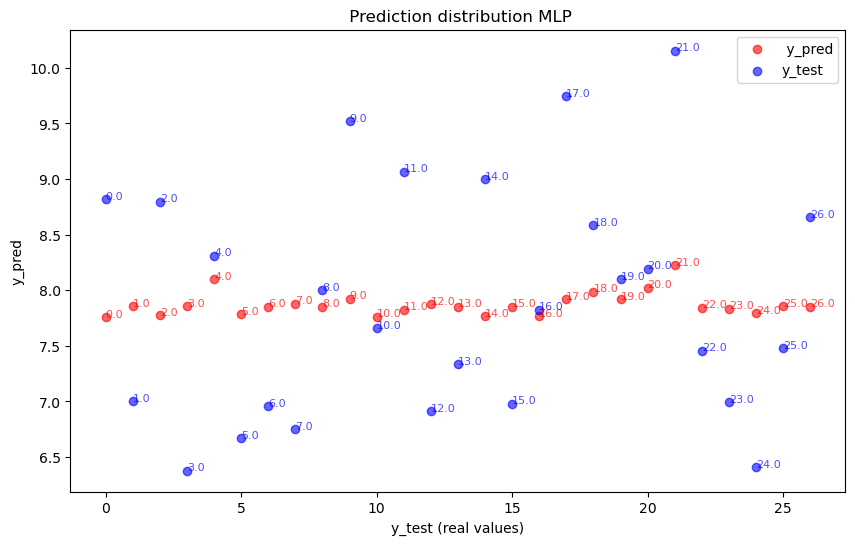

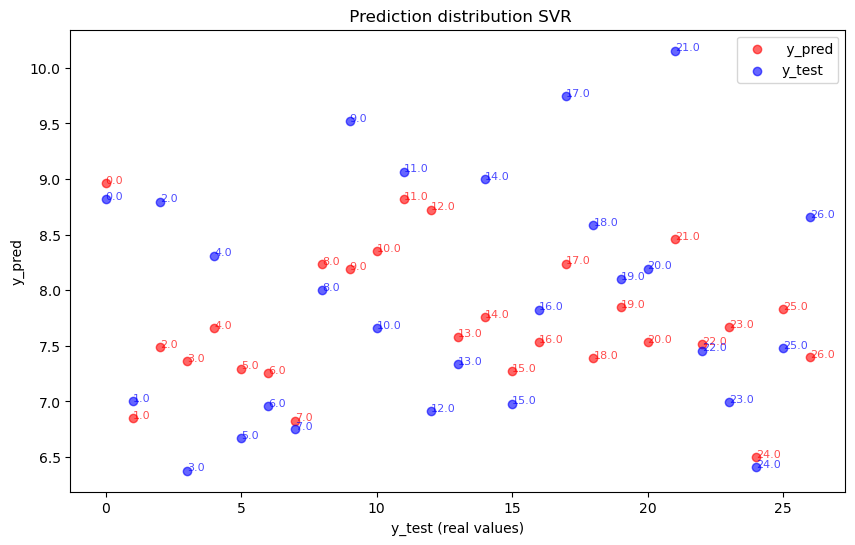

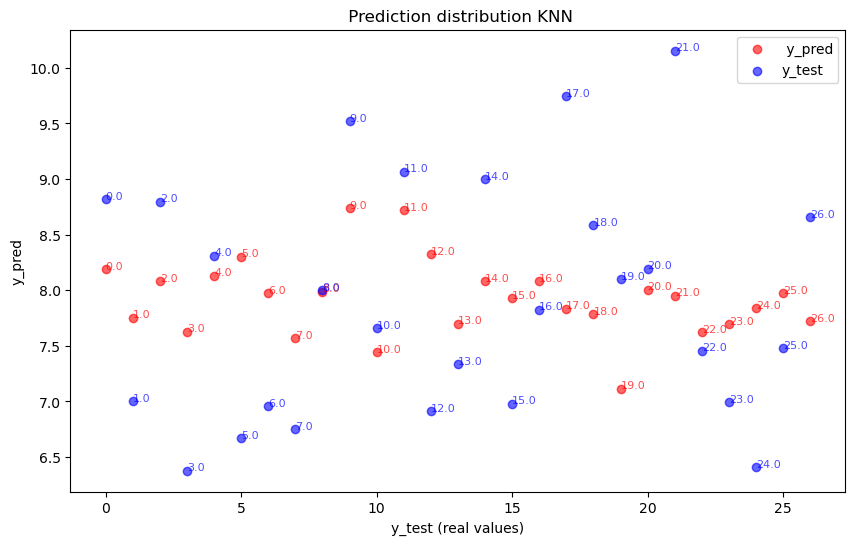

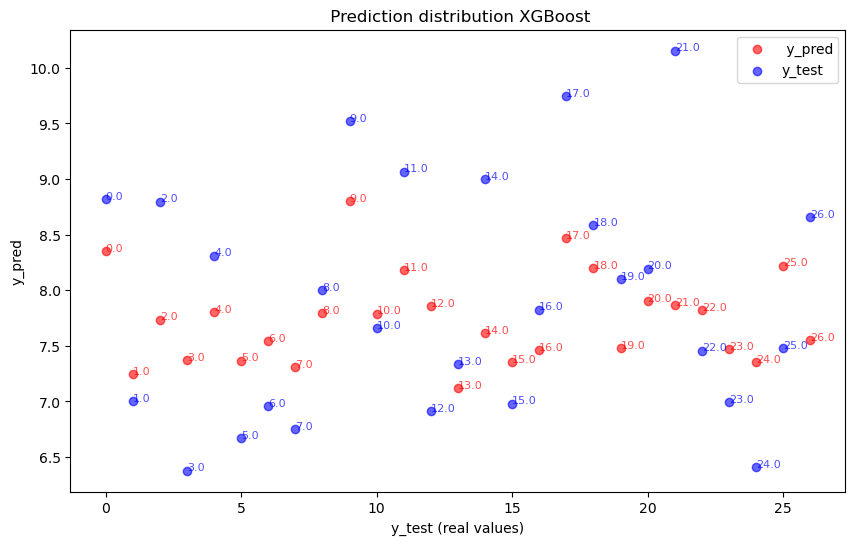

In [ ]:
modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]
result_dir = "/home/federica/LAB2/egfr_qsar/qsar_results/class1/predictions"

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_test.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if 'ID' not in df.columns:
            df['ID'] = df.index

        plt.figure(figsize=(10, 6))
        plt.scatter(df["ID"], df["y_pred"], color="red", alpha=0.6, label=" y_pred")
        plt.scatter(df["ID"], df["y_test"], color="blue", alpha=0.6, label="y_test")


        for i,row in df.iterrows():
            plt.annotate(str(row["ID"]), (row["ID"], row["y_pred"]), fontsize=8, alpha=0.7, color="red")
            plt.annotate(str(row["ID"]), (row["ID"], row["y_test"]), fontsize=8, alpha=0.7, color="blue")

        plt.xlabel("y_test (real values)")
        plt.ylabel("y_pred")
        plt.title(f" Prediction distribution {modello}")
        plt.legend()
        plt.savefig(f'/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/{modello}_point_distribution_test.png')

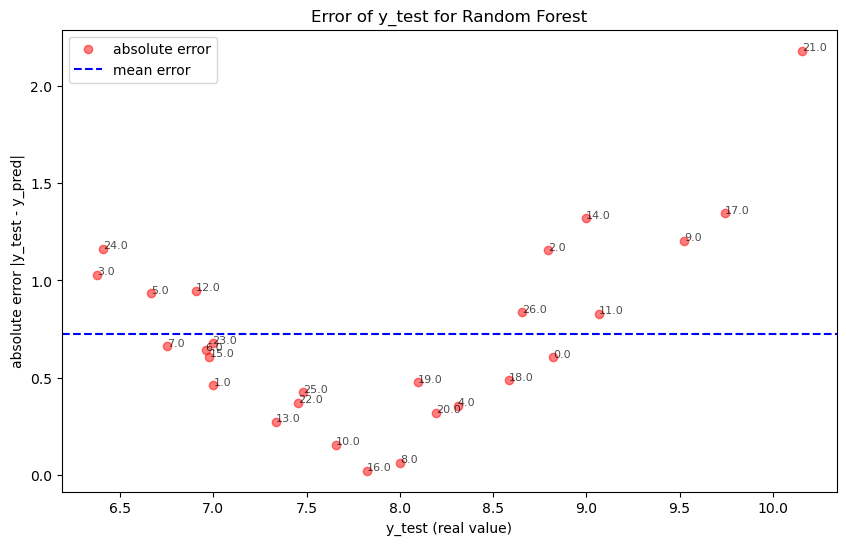

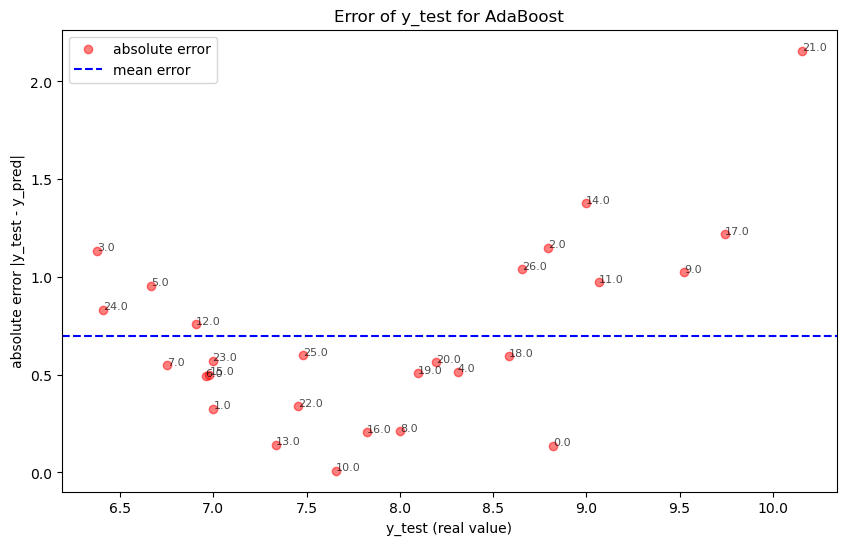

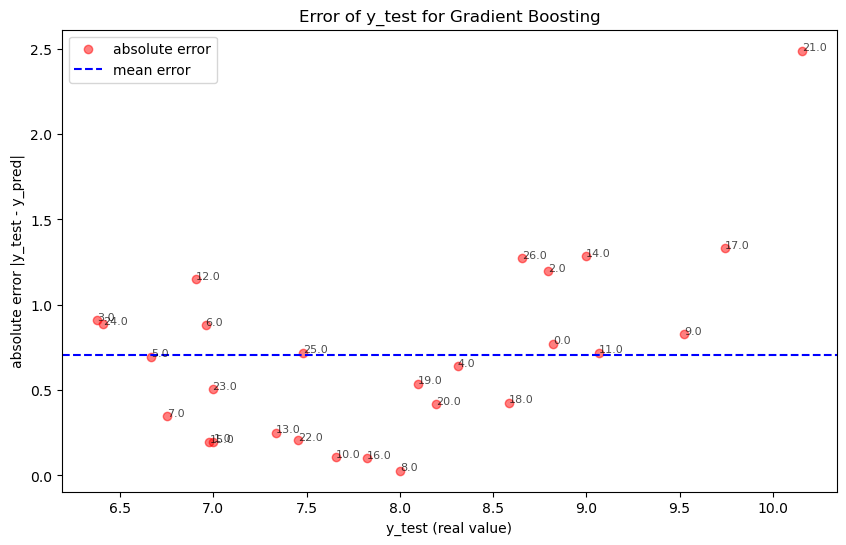

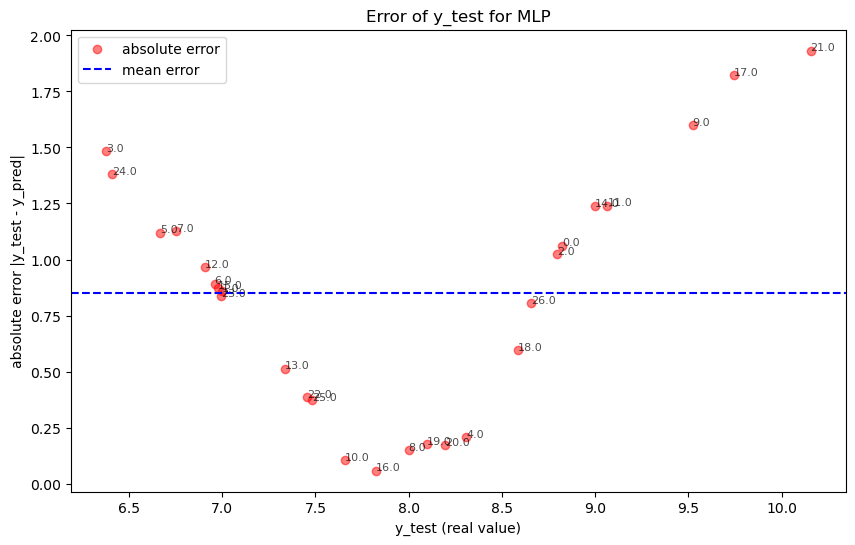

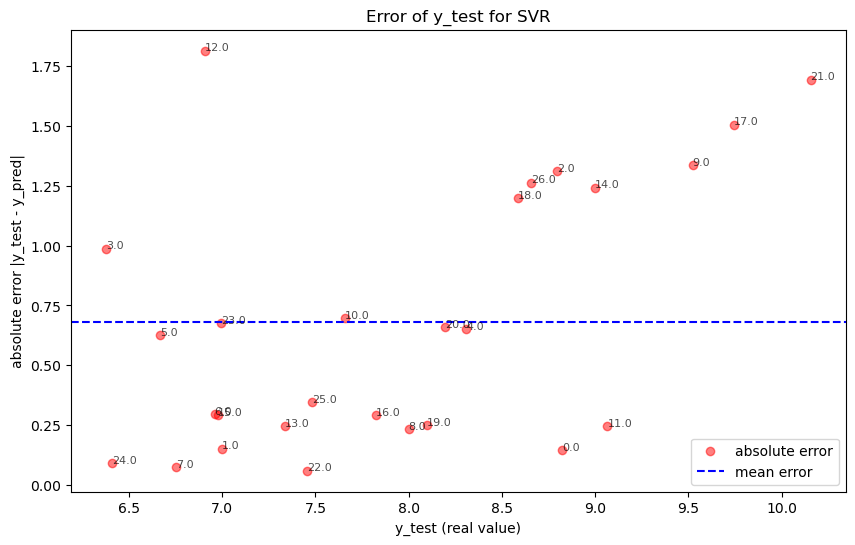

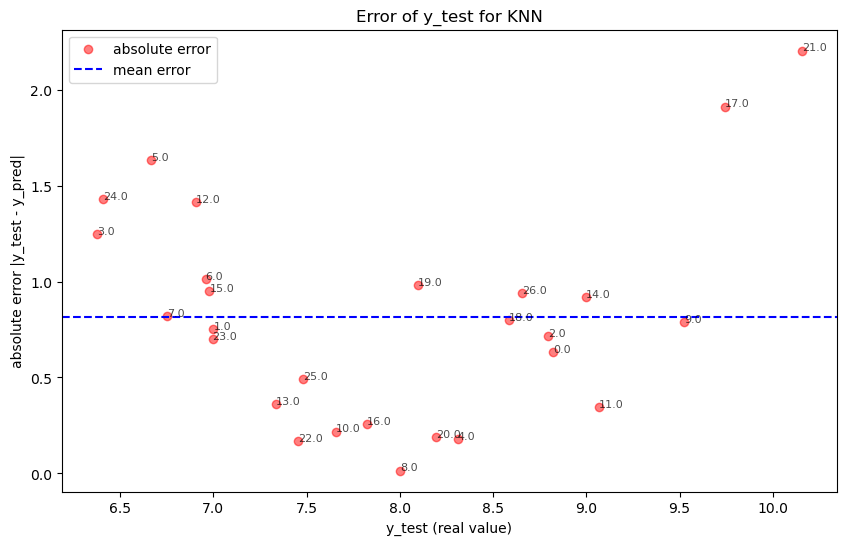

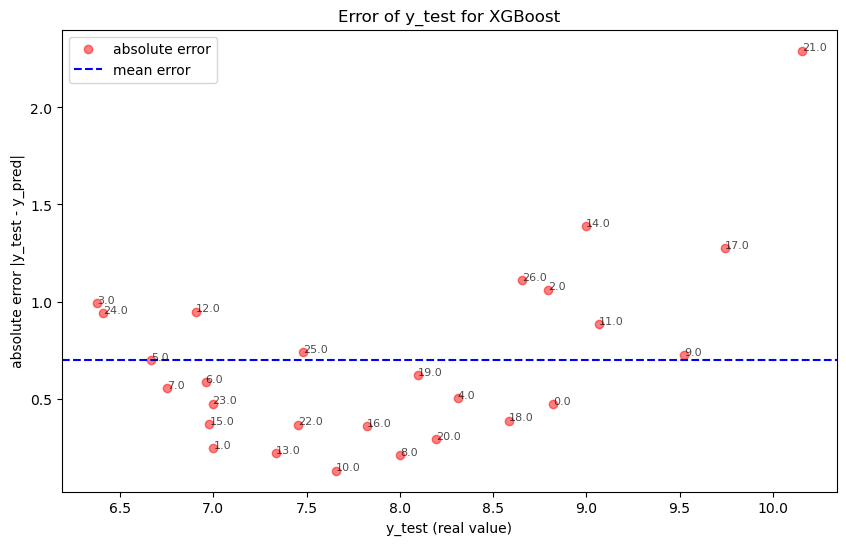

In [ ]:
modelli = ["Random Forest", "AdaBoost", "Gradient Boosting", "MLP", "SVR", "KNN", "XGBoost"]
result_dir = '/home/federica/LAB2/egfr_qsar/qsar_results/class1/predictions/'

for modello in modelli:
    file_path = os.path.join(result_dir, f"{modello}_predictions_test.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if "ID" not in df.columns:
            df["ID"] = df.index  
        df["errore"] = np.abs(df["y_test"] - df["y_pred"])

        plt.figure(figsize=(10, 6))
        plt.scatter(df["y_test"], df["errore"], alpha=0.5, color="red", label="absolute error")
        plt.axhline(y=np.mean(df["errore"]), color="blue", linestyle="--", label="mean error")

        for i, row in df.iterrows():
            plt.annotate(str(row["ID"]), (row["y_test"], row["errore"]), fontsize=8, alpha=0.7)

        plt.xlabel("y_test (real value)")
        plt.ylabel("absolute error |y_test - y_pred|")
        plt.title(f"Error of y_test for {modello}")
        plt.legend()
        plt.savefig(f"/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/{modello}_absolute_error_test.png")


## Distribuzioni set X e Y

Dimensioni X_train: (62, 2047)
Dimensioni X_test: (27, 2047)
  Molecule ChEMBL ID Standard Type Standard Relation  Standard Value  \
0      CHEMBL4792967          IC50               '='            0.17   
1      CHEMBL4460261          IC50               '='           65.00   
2      CHEMBL5175316          IC50               '='           87.00   
3      CHEMBL4098967          IC50               '='            1.90   
4      CHEMBL4790568          IC50               '='            1.01   

  Standard Units                                             Smiles  \
0             nM  C=CC(=O)Nc1cc(Nc2ncc(C(F)(F)F)c(-c3cn(C4COC4)c...   
1             nM  C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...   
2             nM  COc1ccc(C(=O)Nc2cc(Nc3nccc(-c4cn(C)c5ccccc45)n...   
3             nM  C=CC(=O)Nc1cc(Nc2nccc(-c3cn4c5c(cccc35)CCC4)n2...   
4             nM  C#CCn1cc(-c2ccnc(Nc3cc(NC(=O)C=C)c(N(C)CCN(C)C...   

   rdkit_MaxAbsEStateIndex  rdkit_MaxEStateIndex  rdkit_MinAbsEStateIndex  \
0 

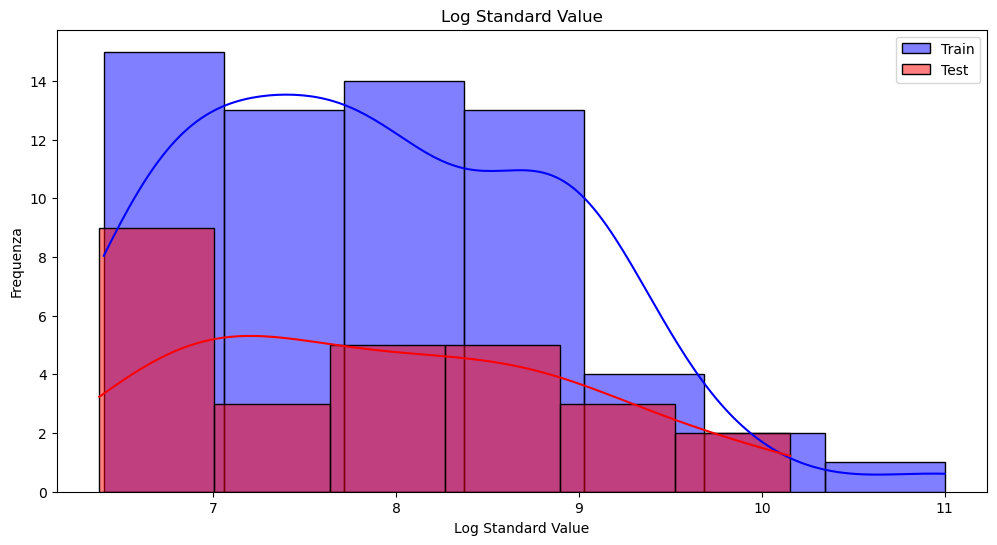

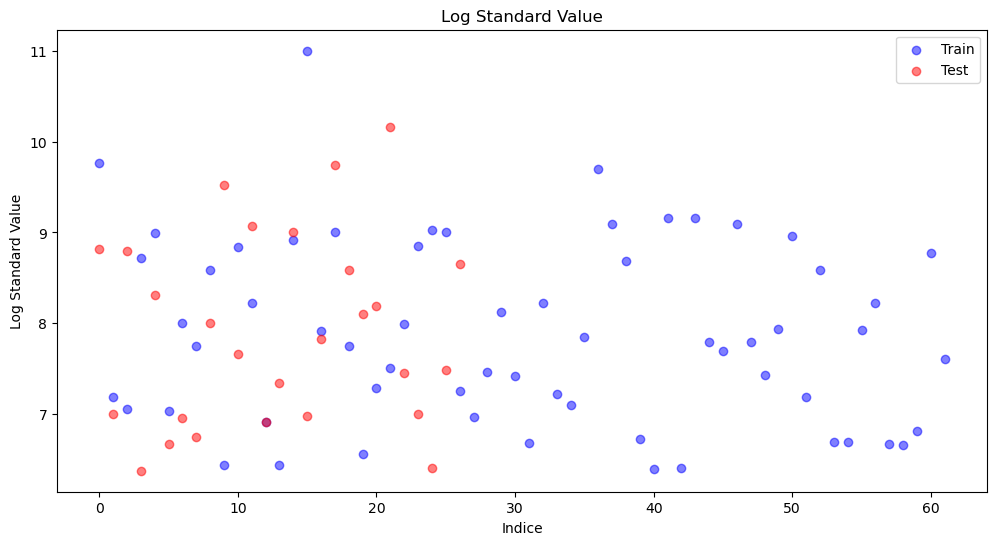

In [ ]:
X_train = pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/x.csv')
X_test = pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/y.csv')
print(f"Dimensioni X_train: {X_train.shape}")
print(f"Dimensioni X_test: {X_test.shape}")
print(X_train.head())
print(X_test.head())
print(X_train.describe())
print(X_test.describe())
plt.figure(figsize=(12, 6))
sns.histplot(X_train['Log Standard Value'], kde=True, color='blue', label='Train')
sns.histplot(X_test['Log Standard Value'], kde=True, color='red', label='Test')
plt.title('Log Standard Value')
plt.xlabel('Log Standard Value')
plt.ylabel('Frequenza')
plt.legend()
plt.savefig('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/Input_histogram_log_standard_value.png')
plt.figure(figsize=(12, 6))
plt.scatter(range(len(X_train)), X_train['Log Standard Value'], color='blue', label='Train', alpha=0.5)
plt.scatter(range(len(X_test)), X_test['Log Standard Value'], color='red', label='Test', alpha=0.5)
plt.title('Log Standard Value')
plt.xlabel('Indice')
plt.ylabel('Log Standard Value')
plt.legend()
plt.savefig('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/Input_scatter_log_standard_value.png')

## Risultati modelli 

In [ ]:
df = pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/predictions/SVR_predictions_retrain_23.csv') 
y_test = df['y_test']
y_pred = df['y_pred']

In [7]:
def pic50_to_ic50(pic50_values):
    return (10 ** (-np.array(pic50_values))) * 1e9

y_test = pic50_to_ic50(y_test)
y_pred = pic50_to_ic50(y_pred)

df_values = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})


In [ ]:
y = pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/y.csv')
df_values["Molecule ChEMBL ID"] = y["Molecule ChEMBL ID"]

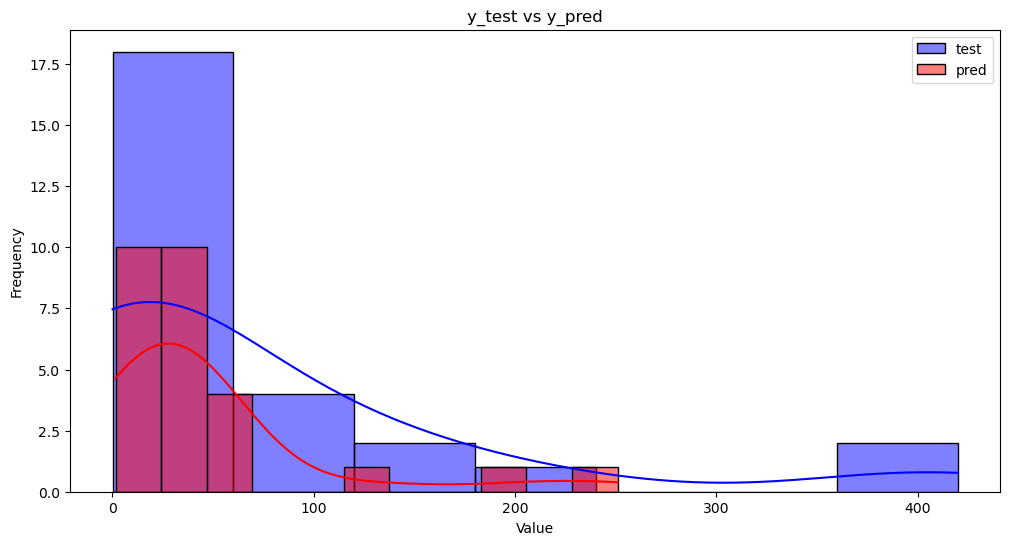

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test, kde=True, color='blue', label='test')
sns.histplot(y_pred, kde=True, color='red', label='pred')
plt.title('y_test vs y_pred')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/y_test_vs_y_pred.png')

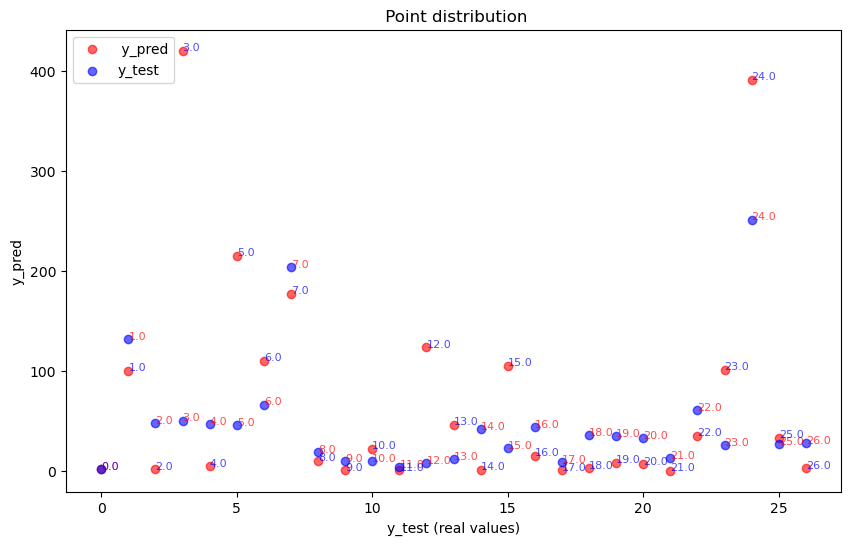

In [ ]:
df['y_test'] = pic50_to_ic50(df['y_test'])
df['y_pred'] = pic50_to_ic50(df['y_pred'])
if 'ID' not in df.columns:
    df['ID'] = df.index

plt.figure(figsize=(10, 6))
plt.scatter(df["ID"], df["y_test"], color="red", alpha=0.6, label=" y_pred")
plt.scatter(df["ID"], df["y_pred"], color="blue", alpha=0.6, label="y_test")


for i,row in df.iterrows():
    plt.annotate(str(row["ID"]), (row["ID"], row["y_pred"]), fontsize=8, alpha=0.7, color="red")
    plt.annotate(str(row["ID"]), (row["ID"], row["y_test"]), fontsize=8, alpha=0.7, color="blue")

plt.xlabel("y_test (real values)")
plt.ylabel("y_pred")
plt.title(f" Point distribution")
plt.legend()
plt.savefig('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/scatter_point_distribution.png')

In [ ]:
df_values["abs_error"] = np.abs(df_values["y_test"] - df_values["y_pred"])
df_values.columns
df_values.to_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/y_values.csv')

## Selected Features

In [ ]:
y_df = pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/y.csv')
selected_features = np.load('/home/federica/LAB2/egfr_qsar/qsar_results/class1/selected_features.npy')
molecule_ids = ['CHEMBL4103912', 'CHEMBL4761468', 'CHEMBL4290812', 'CHEMBL4745195', 'CHEMBL3353410', 'CHEMBL4548960', 'CHEMBL3633141', 'CHEMBL4441933', 'CHEMBL4464879', 'CHEMBL4447982',
'CHEMBL4468034', 'CHEMBL4566583', 'CHEMBL5174232', 'CHEMBL5185772'] 

In [ ]:
df_selected_molecules = y_df[y_df["Molecule ChEMBL ID"].isin(molecule_ids)]
df_selected_features = df_selected_molecules[list(selected_features)]
summary_statistics = df_selected_features.describe().T 
summary_statistics["mean_all"] = y_df[list(selected_features)].mean()
summary_statistics["std_all"] = y_df[list(selected_features)].std()
summary_statistics.to_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/summary_statistics.csv')


In [ ]:
xgb_df = pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/case_XGB_retrain/y_values.csv')
xgb_df["prediction_error"] = abs(xgb_df["y_pred"] - xgb_df["y_test"])
y_df = y_df.merge(xgb_df[["Molecule ChEMBL ID", "prediction_error"]], on="Molecule ChEMBL ID")
correlations = y_df[list(selected_features)].corrwith(xgb_df["prediction_error"]).sort_values(ascending=False)
correlations.to_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/correlations_error.csv')

/home/federica/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/federica/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/tmp/ipykernel_308772/2024604194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')


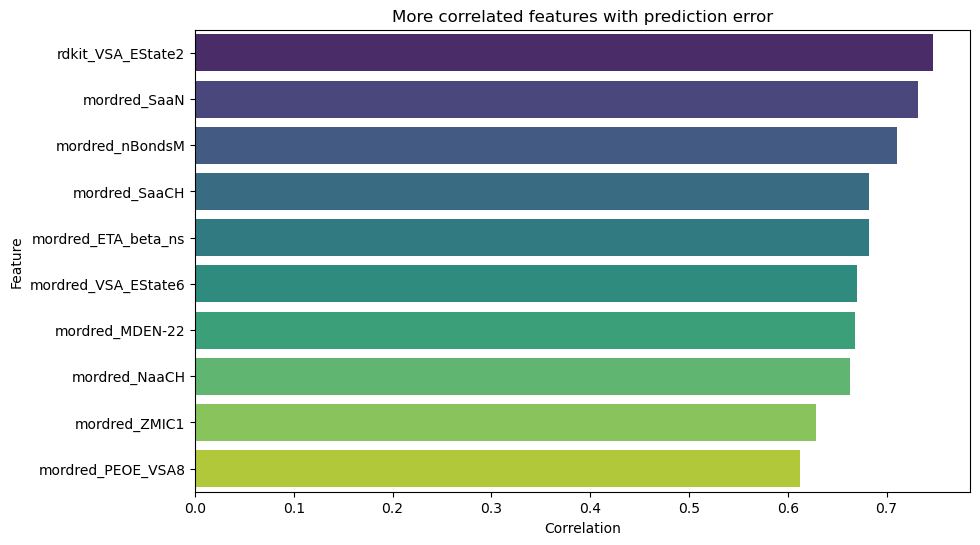

In [ ]:
correlation_data = {
    'Feature': ['rdkit_VSA_EState2', 'mordred_SaaN', 'mordred_nBondsM', 'mordred_SaaCH', 'mordred_ETA_beta_ns', 
                'mordred_VSA_EState6', 'mordred_MDEN-22', 'mordred_NaaCH', 'mordred_ZMIC1', 'mordred_PEOE_VSA8'],
    'Correlation': [0.747164, 0.732023, 0.710881, 0.682753, 0.682454, 0.670146, 0.668460, 0.663132, 0.628807, 0.612620]
}

correlation_df = pd.DataFrame(correlation_data)
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='viridis')
plt.title('More correlated features with prediction error')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.savefig('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/correlation_error_features.png')
plt.show()

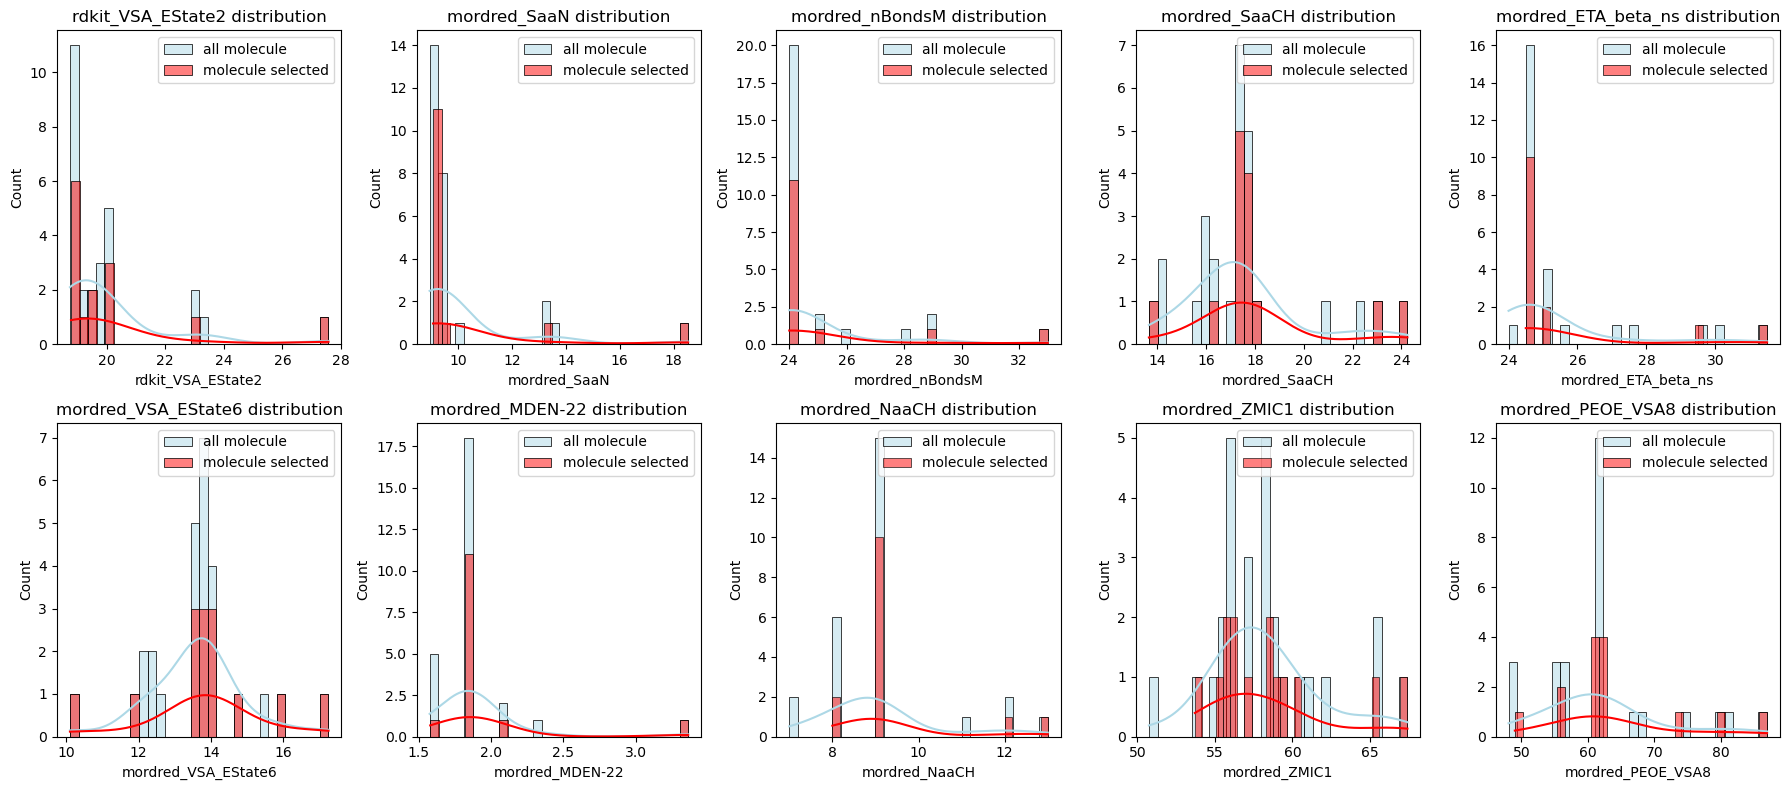

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()
for i, feature in enumerate(correlation_data["Feature"]):
    sns.histplot(y_df[feature], bins=30, kde=True, color="lightblue", label="all molecule", ax=axes[i])
    sns.histplot(df_selected_features[feature], bins=30, kde=True, color="red", label="molecule selected", ax=axes[i])
    axes[i].set_title(f"{feature} distribution")
    axes[i].legend()

plt.tight_layout()
plt.savefig('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/feature_distribution_error_scelected.png')

In [ ]:
df_selected_molecules

In [ ]:
df_selected_features_only = y_df[selected_features]
df_selected_features_only["Molecule ChEMBL ID"] = y_df["Molecule ChEMBL ID"]
df_selected_features_only.to_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class1/features/svr/selected_features_only.csv')

/tmp/ipykernel_308772/1688066746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features_only["Molecule ChEMBL ID"] = y_df["Molecule ChEMBL ID"]


## 95 mol valore inattivo 10000


In [ ]:
sdf_file = "/home/federica/LAB2/egfr_qsar/95molecules_synthetic_inactives.sdf"
suppl = Chem.SDMolSupplier(sdf_file)
data = []
for mol in suppl:
    if mol is not None:
        props = mol.GetPropsAsDict()
        props["Smiles"] = Chem.MolToSmiles(mol)
        data.append(props)
df = pd.DataFrame(data)
df.to_csv('/home/federica/LAB2/egfr_qsar/95molecule_new.csv', index=False)

In [ ]:
df_class_1 = df.loc[(df['class'] == 1) | (df['class'] == 2) | (df['class'] == 3) | (df['class'] == 4)]
df_class_1['Smiles (RDKit Mol)'] = ' '
df_class_1.drop(columns=['mutant', 'class'], inplace=True)
df_class_1.to_csv('/home/federica/LAB2/egfr_qsar/class4_new.csv', index=False)

/tmp/ipykernel_29599/1327421617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1['Smiles (RDKit Mol)'] = ' '
/tmp/ipykernel_29599/1327421617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1.drop(columns=['mutant', 'class'], inplace=True)


In [ ]:
df1=pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class_4.csv')
df2=pd.read_csv('/home/federica/LAB2/egfr_qsar/qsar_results/class4_new.csv')

res = pd.concat([df1, df2])
res.to_csv('/home/federica/LAB2/egfr_qsar/qsar_results/merge_class_4.csv', index=False)

## Metto insieme dati attivi e inattivi

In [ ]:
df=pd.read_csv('/home/federica/LAB2/egfr_qsar/95molecule_inactive2.csv')
df_class_1 = df.loc[(df['class'] == 1)|(df['class'] == 2)|(df['class'] == 3)|(df['class'] == 4)]
df_class_1['Smiles (RDKit Mol)'] = ' '
df_class_1.drop(columns=['mutant', 'class'], inplace=True)
df_class_1.to_csv('/home/federica/LAB2/egfr_qsar/qsar_results/molecule_inactive2_class4.csv', index=False)

/tmp/ipykernel_189289/659909105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1['Smiles (RDKit Mol)'] = ' '
/tmp/ipykernel_189289/659909105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_1.drop(columns=['mutant', 'class'], inplace=True)


## modifico lo standard value


In [ ]:
df = pd.read_csv("/home/federica/LAB2/egfr_qsar/95molecule_inactive.csv")

In [ ]:
inactive_mask = df["Standard Value"] == 10000
random_values = np.random.uniform(10000, 100000, size=inactive_mask.sum())
df.loc[inactive_mask, "Standard Value"] = random_values
df["Standard Value"]
df.to_csv("/home/federica/LAB2/egfr_qsar/95molecule_inactive2.csv", index=False)